# Assignment#6

**Name:** Lama Batta

**ID:** 1210922

<span style="color:blue"> **Import Libraries** </span>

In [476]:
import pandas as pd
import matplotlib.pyplot as plt

In [488]:
# Dictionary to rename columns 
columns_rename = {
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
     'Dystopia.Residual': 'Dystopia Residual',
'Overall rank':'Happiness Rank'
,'Score':'Happiness Score',
'GDP per capita':'Economy (GDP per Capita)',
'Freedom to make life choices':'Freedom',
'Healthy life expectancy':'Health (Life Expectancy)'}
#List of CSV file names 
file_names = ["2015.csv", "2016.csv", "2017.csv", "2018.csv", "2019.csv"]
#array to store dataframes
dataframes = []
for file_name in file_names:
    # Read the CSV file 
    df = pd.read_csv(file_name)
    #Rename columns using dictionary
    df = df.rename(columns=columns_rename) 
    #Split the file name,specify the year and add it as a new column in the dataframe
    year = int(file_name.split(".")[0]) 
    df['Year'] = year  
    dataframes.append(df)
#combine these files into one dataframe
df = pd.concat(dataframes)
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country or region,Social support,Perceptions of corruption
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,NaN,152,3.334,NaN,0.35900,NaN,0.61400,0.55500,NaN,0.21700,NaN,2019,NaN,NaN,NaN,NaN,Rwanda,0.711,0.411
152,NaN,NaN,153,3.231,NaN,0.47600,NaN,0.49900,0.41700,NaN,0.27600,NaN,2019,NaN,NaN,NaN,NaN,Tanzania,0.885,0.147
153,NaN,NaN,154,3.203,NaN,0.35000,NaN,0.36100,0.00000,NaN,0.15800,NaN,2019,NaN,NaN,NaN,NaN,Afghanistan,0.517,0.025
154,NaN,NaN,155,3.083,NaN,0.02600,NaN,0.10500,0.22500,NaN,0.23500,NaN,2019,NaN,NaN,NaN,NaN,Central African Republic,0.000,0.035


**Data cleaning** 

In [489]:
#cheak the missing value 
df.isna().sum()

Country                          312
Region                           467
Happiness Rank                     0
Happiness Score                    0
Standard Error                   624
Economy (GDP per Capita)           0
Family                           312
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)    312
Generosity                         0
Dystopia Residual                312
Year                               0
Lower Confidence Interval        625
Upper Confidence Interval        625
Whisker.high                     627
Whisker.low                      627
Country or region                470
Social support                   470
Perceptions of corruption        471
dtype: int64

<span style="color:blue"> **Note:** According to the results, it was found that there were a large number of missing values. It is possible that these values affect the accuracy of the data, so we must deal with them according to the nature of the data that we have. </span>

In [490]:
#Filling  Missing 'Country' and 'Region' Values coulmns with the Country or Region column values or (unknown value)
df['Country'] = df['Country'].fillna(df['Country or region'])
df['Region'] = df['Region'].fillna(df['Country or region'])
df['Region'] = df['Region'].fillna("unKnown")
#Drop columns 
columns_drop=['Whisker.high','Country or region','Social support','Perceptions of corruption','Family','Dystopia Residual','Whisker.low','Trust (Government Corruption)','Standard Error','Lower Confidence Interval', 'Upper Confidence Interval']
df=df.drop(columns=columns_drop)
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.45811,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.21700,2019
152,Tanzania,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.27600,2019
153,Afghanistan,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.15800,2019
154,Central African Republic,Central African Republic,155,3.083,0.02600,0.10500,0.22500,0.23500,2019


<span style="color:blue"> **Note:** According to the results of the dataframe, most of the columns that we did not need were deleted, the number of missing values was reduced, and the data was improved.</span>

In [492]:
#check the missing value 
df.isna().sum()

Country                     0
Region                      0
Happiness Rank              0
Happiness Score             0
Economy (GDP per Capita)    0
Health (Life Expectancy)    0
Freedom                     0
Generosity                  0
Year                        0
dtype: int64

<span style="color:blue"> **Note:** We checked the missing values to ensure that there were no values, and the results that showed us that there were no missing values for any column</span>

In [493]:
#check duplicated data 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 782, dtype: bool

<span style="color:blue"> **Note:** We checked the duplicate data  to ensure that there were no duplicate, and the results that showed us that there were no duplicate in any row</span>

In [494]:
#create a dictionary for continent name
continent = {
    'Western Europe': 'Europe',
    'North America': 'America',
    'Australia and New Zealand': 'Oceania',
    'Middle East and Northern Africa': 'Africa',
    'Latin America and Caribbean': 'America',
    'Southeastern Asia': 'Asia',
    'Central and Eastern Europe': 'Europe',
    'Eastern Asia': 'Asia',
    'Sub-Saharan Africa': 'Africa',
    'Southern Asia': 'Asia',
    'Finland': 'Europe',
    'Norway': 'Europe',
    'Denmark': 'Europe',
    'Iceland': 'Europe',
    'Switzerland': 'Europe',
    'Netherlands': 'Europe',
    'Canada': 'America',
    'New Zealand': 'Oceania',
    'Sweden': 'Europe',
    'Australia': 'Oceania',
    'United Kingdom': 'Europe',
    'Austria': 'Europe',
    'Costa Rica': 'America',
    'Ireland': 'Europe',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'Luxembourg': 'Europe',
    'United States': 'America',
    'Israel': 'Asia',
    'United Arab Emirates': 'Asia',
    'Czech Republic': 'Europe',
    'Malta': 'Europe',
    'France': 'Europe',
    'Mexico': 'America',
    'Chile': 'America',
    'Taiwan': 'Asia',
    'Panama': 'America',
    'Brazil': 'America',
    'Argentina': 'America',
    'Guatemala': 'America',
    'Uruguay': 'America',
    'Qatar': 'Asia',
    'Saudi Arabia': 'Asia',
    'Singapore': 'Asia',
    'Malaysia': 'Asia',
    'Spain': 'Europe',
    'Colombia': 'America',
    'Trinidad & Tobago': 'America',
    'Slovakia': 'Europe',
    'El Salvador': 'America',
    'Nicaragua': 'America',
    'Poland': 'Europe',
    'Bahrain': 'Asia',
    'Uzbekistan': 'Asia',
    'Kuwait': 'Asia',
    'Thailand': 'Asia',
    'Italy': 'Europe',
    'Ecuador': 'America',
    'Belize': 'America',
    'Lithuania': 'Europe',
    'Slovenia': 'Europe',
    'Romania': 'Europe',
    'Latvia': 'Europe',
    'Japan': 'Asia',
    'Mauritius': 'Africa',
    'Jamaica': 'America',
    'South Korea': 'Asia',
    'Northern Cyprus': 'Europe',
    'Kazakhstan': 'Asia',
    'Cyprus': 'Europe',
    'Bolivia': 'America',
    'Estonia': 'Europe',
    'Paraguay': 'America',
    'Peru': 'America',
    'Kosovo': 'Europe',
    'Moldova': 'Europe',
    'Turkmenistan': 'Asia',
    'Hungary': 'Europe',
    'Libya': 'Africa',
    'Philippines': 'Asia',
    'Honduras': 'America',
    'Belarus': 'Europe',
    'Pakistan': 'Asia',
    'Hong Kong': 'Asia',
    'Portugal': 'Europe',
    'Serbia': 'Europe',
    'Greece': 'Europe',
    'Lebanon': 'Asia',
    'Montenegro': 'Europe',
    'Croatia': 'Europe',
    'Dominican Republic': 'America',
    'Algeria': 'Africa',
    'Morocco': 'Africa',
    'China': 'Asia',
    'Azerbaijan': 'Asia',
    'Tajikistan': 'Asia',
    'North Macedonia': 'Europe',
    'Jordan': 'Asia',
    'Nigeria': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Bosnia and Herzegovina': 'Europe',
    'Mongolia': 'Asia',
    'Vietnam': 'Asia',
    'Indonesia': 'Asia',
    'Bhutan': 'Asia',
    'Somalia': 'Africa',
    'Cameroon': 'Africa',
    'Bulgaria': 'Europe',
    'Nepal': 'Asia',
    'Venezuela': 'America',
    'Gabon': 'Africa',
    'Palestinian Territories': 'Asia',
    'South Africa': 'Africa',
    'Iran': 'Asia',
    'Ivory Coast': 'Africa',
    'Ghana': 'Africa',
    'Senegal': 'Africa',
    'Laos': 'Asia',
    'Tunisia': 'Africa',
    'Albania': 'Europe',
    'Sierra Leone': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Bangladesh': 'Asia',
    'Sri Lanka': 'Asia',
    'Iraq': 'Asia',
    'Mali': 'Africa',
    'Namibia': 'Africa',
    'Cambodia': 'Asia',
    'Burkina Faso': 'Africa',
    'Egypt': 'Africa',
    'Mozambique': 'Africa',
    'Kenya': 'Africa',
    'Zambia': 'Africa',
    'Mauritania': 'Africa',
    'Ethiopia': 'Africa',
    'Armenia': 'Asia',
    'Myanmar': 'Asia',
    'Chad': 'Africa',
    'Congo (Kinshasa)': 'Africa',
    'India': 'Asia',
    'Niger': 'Africa',
    'Uganda': 'Africa',
    'Benin': 'Africa',
    'Sudan': 'Africa',
    'Ukraine': 'Europe',
    'Togo': 'Africa',
    'Guinea': 'Africa',
    'Lesotho': 'Africa',
    'Angola': 'Africa',
    'Madagascar': 'Africa',
    'Zimbabwe': 'Africa',
    'Afghanistan': 'Asia',
    'Botswana': 'Africa',
    'Malawi': 'Africa',
    'Haiti': 'America',
    'Liberia': 'Africa',
    'Syria': 'Asia',
    'Rwanda': 'Africa',
    'Yemen': 'Asia',
    'Tanzania': 'Africa',
    'South Sudan': 'Africa',
    'Central African Republic': 'Africa',
    'Burundi': 'Africa' 
}
#using map to create new columns 
df['Continent'] = df['Region'].map(continent)

<span style="color:blue"> **Note:** We created a dictionary called continent where the keys are regions, and the values ​​are the corresponding continents.
It then uses the map() function to create a new column called continent in the DataFrame df, which maps each country's region to its continent using the continent dictionary. </span>

 **1. Which region have highest happiness score, and which have lowest**

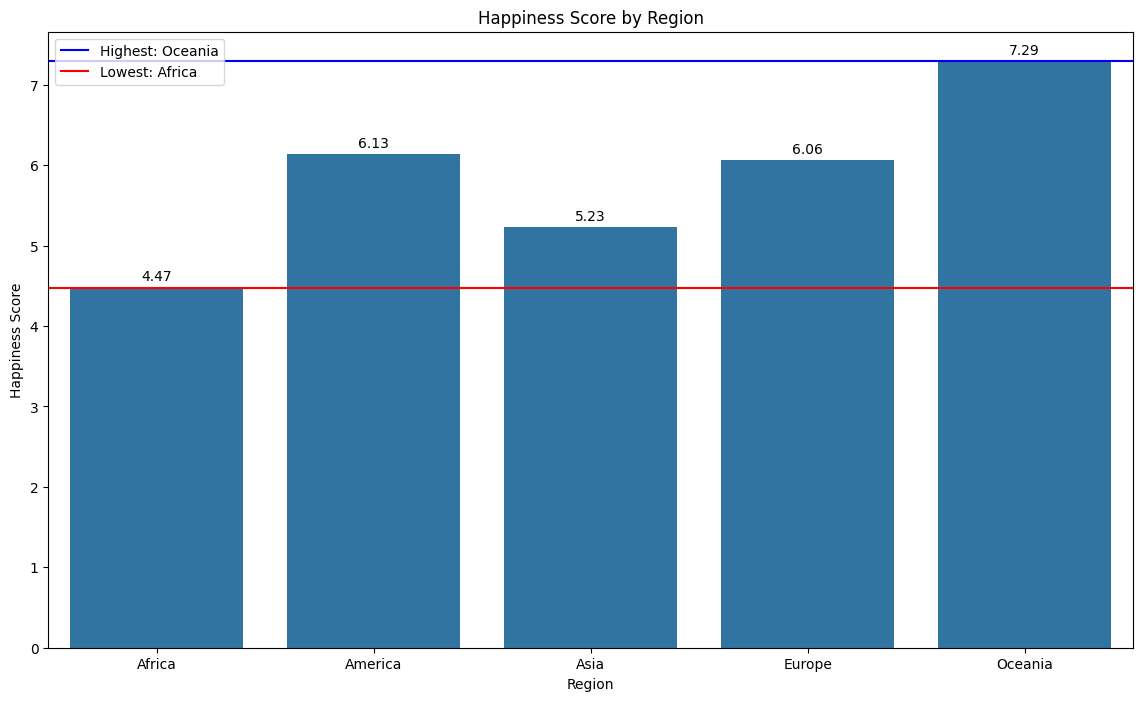

Highest happiness score 7.2935 of the Region Oceania
Lowest happiness score 4.474743842364532 of the Region Africa


In [528]:
import seaborn as sns
# Grouping the DataFrame by continent and calculating the mean Happiness Score
Region_Happiness_Score= df.groupby('Continent')['Happiness Score'].mean().reset_index()
#highest and lowest happiness score value for region
highest_happiness_region = Region_Happiness_Score.loc[Region_Happiness_Score['Happiness Score'].idxmax()]
lowest_happiness_region = Region_Happiness_Score.loc[Region_Happiness_Score['Happiness Score'].idxmin()]
plt.figure(figsize=(14, 8))
for index, row in Region_Happiness_Score.iterrows():
    plt.annotate(f"{row['Happiness Score']:.2f}", 
                 xy=(index, row['Happiness Score']),
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center',
                 color='black')
sns.barplot(x='Continent', y='Happiness Score', data=Region_Happiness_Score)
plt.title('Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.axhline(y=highest_happiness_region['Happiness Score'], color='blue', label=f"Highest: {highest_happiness_region['Continent']}")
plt.axhline(y=lowest_happiness_region['Happiness Score'], color='red', label=f"Lowest: {lowest_happiness_region['Continent']}")
plt.legend()
plt.show()
#print #highest and lowest happiness score value with region
print(f"Highest happiness score {highest_happiness_region['Happiness Score']} of the Region {highest_happiness_region['Continent']}")
print(f"Lowest happiness score {lowest_happiness_region['Happiness Score']} of the Region {lowest_happiness_region['Continent']}")

<span style="color:blue"> **Note:** The bar plot visualizes the average Happiness Score for each Region on each continent , with Oceania having the highest average score of approximately 7.29 and Africa having the lowest average score of approximately 4.47. This interpretation is based on the data presented in the plot. </span>

**2. Which regions have countries with extream (outliers) happiness score?Find the regions and the countries**

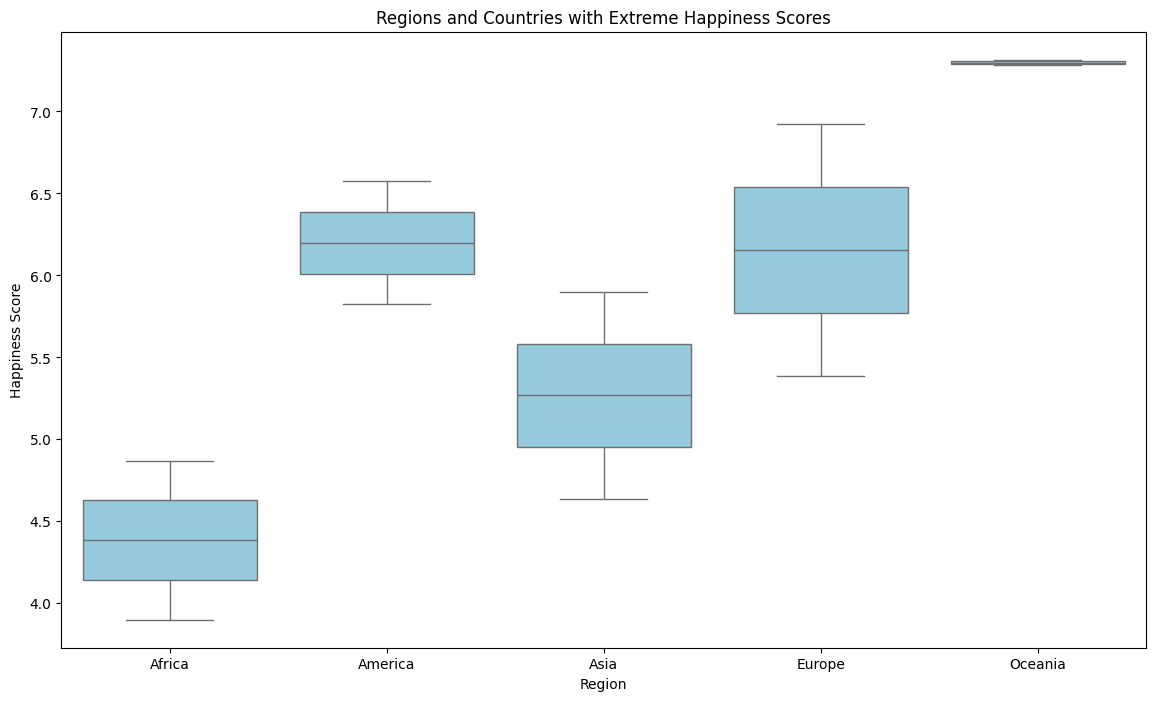

In [525]:
# Grouping the DataFrame by continent and calculating the quantile Happiness Score
Region_outliers = df.groupby('Continent')['Happiness Score'].quantile([0.25,0.75]).reset_index()
plt.figure(figsize=(14, 8))
sns.boxplot(x='Continent', y='Happiness Score',data=Region_outliers,color='skyblue')
plt.title('Regions and Countries with Extreme Happiness Scores')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()    

<span style="color:blue"> **Note:** By analyzing the box plot, we can identify regions where countries show extreme happiness scores, whether exceptionally high or low, compared to the majority of countries in their regions. Our results show that in Oceania, the longer box indicates the more significant spread in happiness scores. And Africa and Asia Longer whiskers in these regions indicate that there may be more outliers compared to other regions.</span>

**3. Show how the global happiness score change over time**

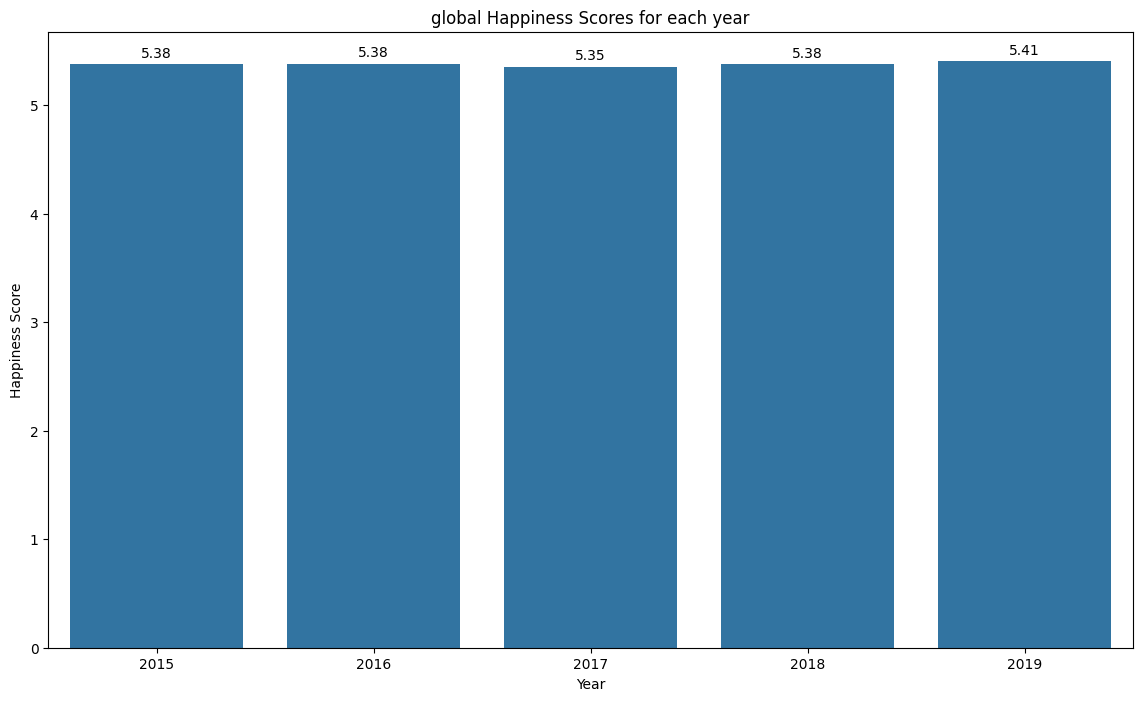

In [527]:
# Grouping the DataFrame by Year and calculating the mean Happiness Score
happiness_score_byYear=df.groupby('Year')['Happiness Score'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=happiness_score_byYear, x = 'Year', y='Happiness Score')
for index, row in happiness_score_byYear.iterrows():
    plt.annotate(f"{row['Happiness Score']:.2f}", 
                 xy=(index, row['Happiness Score']),
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center',
                 color='black')
plt.title('global Happiness Scores for each year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

<span style="color:blue"> **Note:** The bar plot suggests a generally positive trend in global happiness scores from 5.38 in 2015 to 5.41 in 2019., with some year-to-year variations. </span>


 **4. How does the Happiness Score change by Region?**

C:\Users\user\AppData\Local\Temp\ipykernel_19088\478162040.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(x='Continent', y='Happiness Score',hue='Year',data=Region_Happiness_Score,color='skyblue')


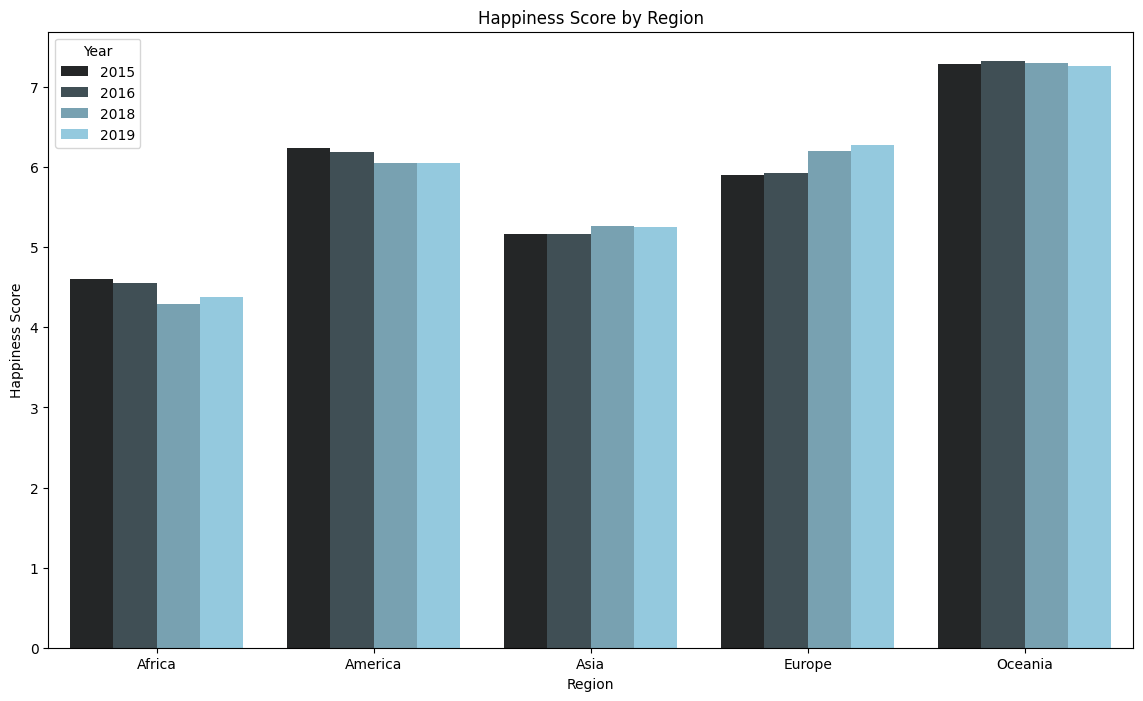

In [529]:
# Grouping the DataFrame by Region and calculating the mean Happiness Score
Region_Happiness_Score = df.groupby(['Continent','Year'])['Happiness Score'].mean().reset_index()
egion_Happiness_Score = Region_Happiness_Score.sort_values(by='Happiness Score', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Continent', y='Happiness Score',hue='Year',data=Region_Happiness_Score,color='skyblue')
plt.title('Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

<span style="color:blue"> **Note:** The bar chart shows how average happiness scores change across different regions by year. The results showed that in some regions the degree of happiness varied from year to year, either by increasing or decreasing. This is due to the factors that affect the degree of happiness in each region during the years. </span>


 **5. Based on the data and your intuition,how you expect the global happiness score in the following 2 years?**

Based on the data that has emerged, it is expected that the global happiness measure will be affected during the next two years by several factors that may lead to an increase or decline in the degree of happiness. According to what we have found, each region has a specific assessment of the degree of happiness, and it changes with each year, either increasing or decreasing